In [0]:
from google.colab import drive
drive.mount('/content/drive/')

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

In [0]:
%cd /content/drive/My\ Drive/AutoEncoders/

In [0]:
import os
from matplotlib import pyplot as plt
from math import floor
import seaborn as sns
import pandas as pd
import numpy as np
import random
from scipy import ndarray      # n-dimensional Array
import skimage as sk           # used for image Processing
from skimage import transform
from skimage import util
import warnings
import keras
warnings.filterwarnings('ignore')  # remove the warnings
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from keras.regularizers import l2,l1 # for model
from keras.layers import Input,Conv2D,Dense, Dropout, BatchNormalization, MaxPooling2D, Activation, Flatten, AvgPool2D,InputLayer,GlobalAveragePooling2D,UpSampling2D
from keras.layers import  BatchNormalization as btn
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras.callbacks import LearningRateScheduler   
from IPython.display import HTML
import base64
from keras.optimizers import RMSprop
from scipy.ndimage.interpolation import shift
from keras.optimizers import Adam
from keras.datasets import cifar10
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
import cv2 as cv
import math

%matplotlib inline

In [0]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, test_size=0.1)

In [56]:
print("Shape of X_train:  ",X_train.shape)
print("Shape of y_train:  ",y_train.shape)
print("="*40)
print("Shape of X_val:  ",X_val.shape)
print("Shape of y_val:  ",y_val.shape)
print("="*40)
print("Shape of X_test:  ",X_test.shape)
print("Shape of y_test:  ",y_test.shape)

Shape of X_train:   (54000, 28, 28)
Shape of y_train:   (54000,)
Shape of X_val:   (6000, 28, 28)
Shape of y_val:   (6000,)
Shape of X_test:   (10000, 28, 28)
Shape of y_test:   (10000,)


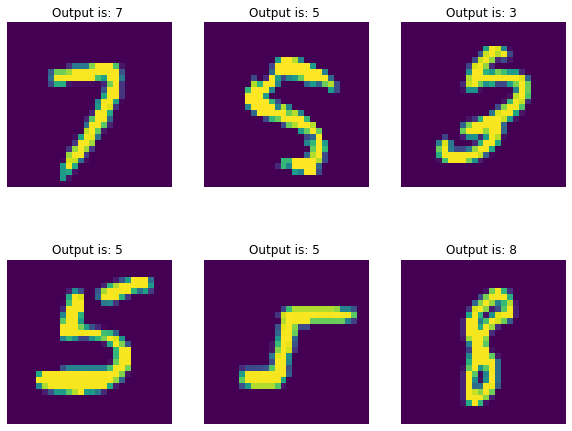

In [8]:
# visulaization of Denoised Image
plt.figure(figsize=(10,8))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(X_train[i])
  plt.title(f"Output is: {y_train[i]} ")
  plt.axis('off')

In [57]:
X_train = X_train.astype('float32')/255.0
X_val = X_val.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

X_train = np.reshape(X_train, newshape=(len(X_train),784))
X_val = np.reshape(X_val, newshape=(len(X_val),784))
X_test = np.reshape(X_test, newshape=(len(X_test),784))

print(f'Shape of X_train:  ',X_train.shape)
print(f'Shape of X_val:  ',X_val.shape)
print(f'Shape of X_test: ',X_test.shape)

Shape of X_train:   (54000, 784)
Shape of X_val:   (6000, 784)
Shape of X_test:  (10000, 784)


In [0]:
# Designing of Encoder

input_image = Input(shape=(784,))

encoder = Dense(1024, activation='relu', activity_regularizer=l2(0.00001))(input_image)
# encoder = Dense(1024, activation='relu', activity_regularizer=l1(10e-5))(encoder)
# encoder = Dense(128, activation='relu')(encoder)

# in sparse encoder we add the activity regualarizers as a sparsity contraints so that it does not copy the inputs layer information direct to the output layer.
# activity regularizers is responsible to regularize the hidden layer, so that the output gets optimized.

In [0]:
# Designing of Decoder

# decoder = Dense(128, activation='relu', activity_regularizer=l1(0.01))(encoder)
output = Dense(784, activation='sigmoid')(encoder)

In [0]:
sparse_model = Model(input_image, output)

In [109]:
sparse_model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_42 (Dense)             (None, 784)               803600    
Total params: 1,607,440
Trainable params: 1,607,440
Non-trainable params: 0
_________________________________________________________________


In [0]:
sparse_model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [111]:
history = sparse_model.fit(X_train, X_train, batch_size=64, epochs=20, validation_data=(X_val,X_val))

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 3s 48us/step - loss: 0.1437 - accuracy: 0.8128 - val_loss: 0.1018 - val_accuracy: 0.8151
Epoch 2/20
54000/54000 [==============================] - 2s 46us/step - loss: 0.0940 - accuracy: 0.8154 - val_loss: 0.0888 - val_accuracy: 0.8152
Epoch 3/20
54000/54000 [==============================] - 3s 47us/step - loss: 0.0854 - accuracy: 0.8154 - val_loss: 0.0830 - val_accuracy: 0.8153
Epoch 4/20
54000/54000 [==============================] - 3s 47us/step - loss: 0.0812 - accuracy: 0.8155 - val_loss: 0.0801 - val_accuracy: 0.8153
Epoch 5/20
54000/54000 [==============================] - 3s 48us/step - loss: 0.0787 - accuracy: 0.8155 - val_loss: 0.0785 - val_accuracy: 0.8153
Epoch 6/20
54000/54000 [==============================] - 3s 48us/step - loss: 0.0770 - accuracy: 0.8155 - val_loss: 0.0771 - val_accuracy: 0.8153
Epoch 7/20
54000/54000 [==============================] - 3s 47us/ste

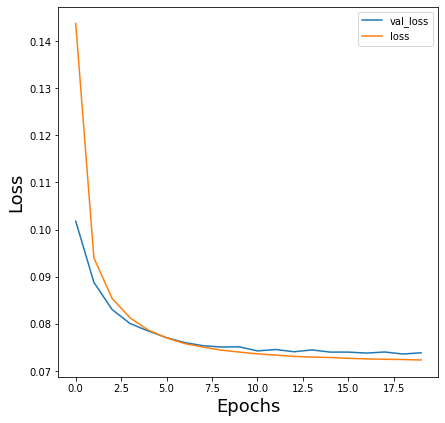

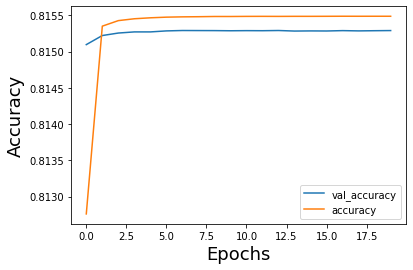

In [112]:
name_title = ['Loss','Accuracy']
# for net in range(nets):
fig=plt.figure(figsize=(64,64))
for i in range(0,2):
    ax=fig.add_subplot(8,8,i+1)
    plt.plot(history.history[list(history.history.keys())[i]], label = list(history.history.keys())[i] )
    plt.plot(history.history[list(history.history.keys())[i+2]],label = list(history.history.keys())[i+2] )
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel(name_title[i], fontsize=18)
    plt.legend()
    plt.show()

In [0]:
test_predict = sparse_model.predict(X_test)

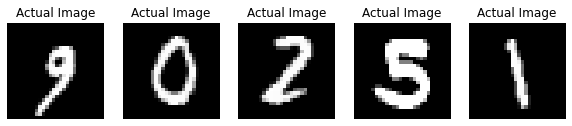

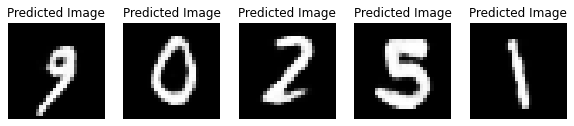

In [114]:
plt.figure(num=1,figsize=(10,8))
for i in range(1000,1005):
  plt.subplot(1,5,i+1-1000)
  plt.imshow(X_test[i].reshape((28,28)),cmap='gray')
  plt.title("Actual Image")
  plt.axis('off')

plt.figure(num=2,figsize=(10,8))
for j in range(1000,1005):
  plt.subplot(1,5,j+1-1000)
  plt.imshow(test_predict[j].reshape((28,28)),cmap='gray')
  plt.title("Predicted Image")
  plt.axis('off')

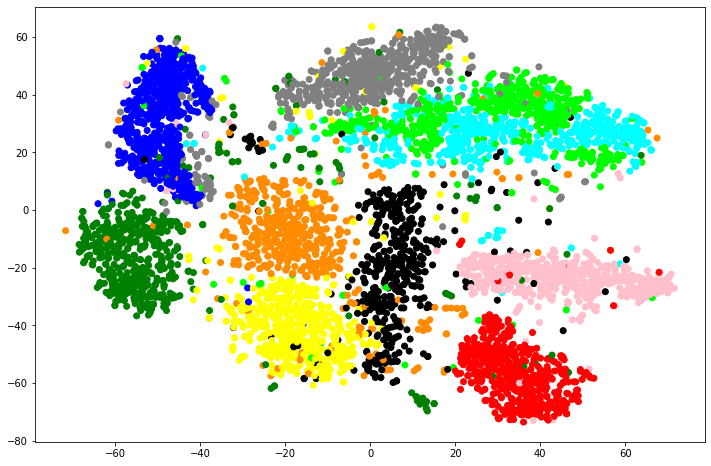

In [119]:
# Dimensionality reduction Visualization
plt.figure(figsize=(12,8))
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=60,learning_rate=200.0,n_iter=5000)
X_embedding = tsne.fit_transform(test_predict[:5000])                # taking only first 5000 rows because for larger dataset it takes lot of time.
X_joint = np.hstack((X_embedding,y_test[:5000].reshape(-1,1)))
X_dataFrame = pd.DataFrame(X_joint,columns=['Dimension_1','Dimension_2','Output'])
colors = {0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'aqua', 5:'black', 6:'pink', 7:'gray', 8:'darkorange', 9:'lime'}

plt.scatter(X_dataFrame['Dimension_1'], X_dataFrame['Dimension_2'], c=X_dataFrame['Output'].apply(lambda x: colors[x]))
plt.savefig(fname='Tsne_plots/sparse_autoEncoder.png',)
plt.show()